由顧客資料(marketData)，瞭解客戶，
顧客資料包含: CustomerID、Age、Gender、Annual Income、Spending Score，
Spending Score: 根據顧客行為和購買物品所設定。

### K-means Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster

In [2]:
%matplotlib inline

###  Data

In [3]:
inputPath = r"C:\Users\owner\Desktop\資料採掘\hw\P2\DM23_P2\DM23_P2\data\\"

In [4]:
import pandas as pd
# 读取数据
marketData_df = pd.read_csv(inputPath + "marketData.csv")
marketData_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### 1. 
從marketData 的資料中，取女性客戶的兩個欄位: Age、Spending Score 進行客戶分群，
請使用K-means 分群法，當K = 2 時，請列出每一群的中心點，例如C1中心點: Age=33.3、Spending Score=87.1。2 個中心點的列表請根據中心點的Age 數值升冪排序。

In [5]:
from sklearn.cluster import KMeans

# 選取女性客戶的資料
female_customers = marketData_df[marketData_df['Gender'] == 'Female'][['Age', 'Spending Score (1-100)']]
female_customers


,Age,Spending Score (1-100)
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
...,...,...
191,32,69
193,38,91
194,47,16
195,35,79


In [6]:
# 使用K-means進行分群，K=2
k_means = KMeans(n_clusters=2, random_state=1)
k_means.fit(female_customers)

# 取得每一群的中心點
centers = pd.DataFrame(k_means.cluster_centers_, columns=['Age', 'Spending Score (1-100)'])

# 根據中心點的Age數值升冪排序
centers_sorted = centers.sort_values(by='Age').reset_index(drop=True)

# 列印結果
print("每一群的中心點:")
print(centers_sorted)
centers_sorted


每一群的中心點:
         Age  Spending Score (1-100)
0  29.076923               78.179487
1  42.917808               37.287671


,Age,Spending Score (1-100)
0,29.076923,78.179487
1,42.917808,37.287671


### 2. 
承第1題，請利用Elbow 方法找出K 應該設置多少？

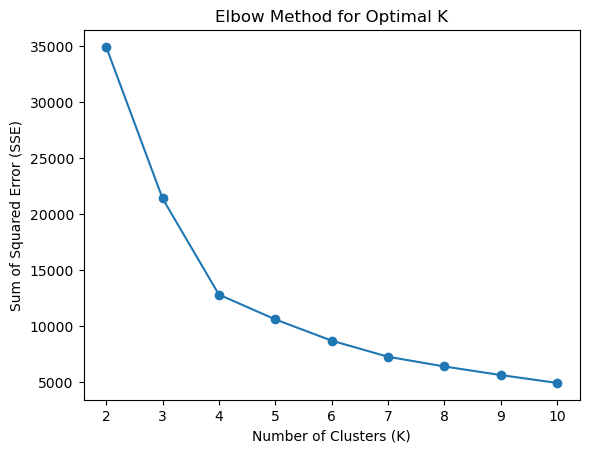

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 初始化KMeans模型，嘗試不同的K值
k_values = range(2, 11)
sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(female_customers)
    sse.append(kmeans.inertia_)  # inertia_ 存儲了每個樣本到其簇中心的距離平方和
    
# 繪製Elbow圖
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()


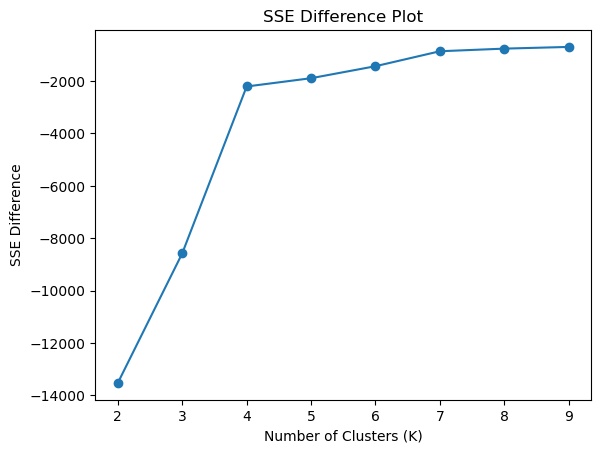

In [8]:
# 計算相鄰點之間的SSE差異
sse_diff = np.diff(sse)

plt.plot(range(2, 10), sse_diff, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE Difference')
plt.title('SSE Difference Plot')
plt.show()

### 3.
從marketData 的資料中，取所有客戶的三個欄位: Age、Annual Income (k)、Spending Score (1-100) 進行客戶分群，
請使用K-means 分群法，當K = 3 時，請列出每一群的中心點，
例如C1中心點: Age=33.3、Annual Income (k)=87.1、Spending Score (1-100)=88.1。
3 個中心點的列表請根據中心點的Age 數值升冪排序。

In [9]:
# 選取所有客戶的資料
all_customers = marketData_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
all_customers


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [10]:
# 使用K-means進行分群，K=3
k_means_all = KMeans(n_clusters=3, random_state=1)
k_means_all.fit(all_customers)

# 取得每一群的中心點
centers_all = pd.DataFrame(k_means_all.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# 根據中心點的Age數值升冪排序並重新設定index
centers_all_sorted = centers_all.sort_values(by='Age').reset_index(drop=True)

# 列印結果
print("每一群的中心點:")
print(centers_all_sorted)
centers_all_sorted

每一群的中心點:
         Age  Annual Income (k$)  Spending Score (1-100)
0  32.692308           86.538462               82.128205
1  40.325203           44.154472               49.829268
2  40.394737           87.000000               18.631579


,Age,Annual Income (k$),Spending Score (1-100)
0,32.692308,86.538462,82.128205
1,40.325203,44.154472,49.829268
2,40.394737,87.000000,18.631579


### 4.
承第3題，請利用Elbow 方法找出K 應該設置多少？

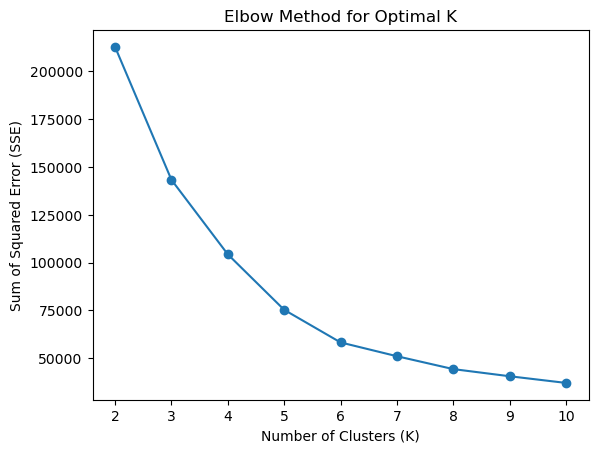

In [11]:
# 初始化KMeans模型，嘗試不同的K值
k_values = range(2, 11)
sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(all_customers)
    sse.append(kmeans.inertia_)  # inertia_ 存儲了每個樣本到其簇中心的距離平方和

# 繪製Elbow圖
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()


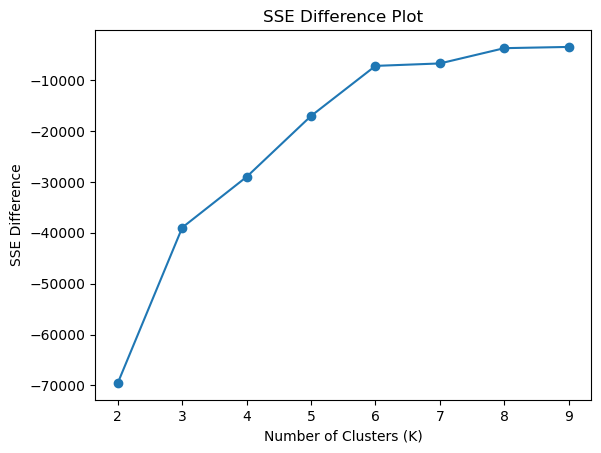

In [12]:
# 計算相鄰點之間的SSE差異
sse_diff = np.diff(sse)

plt.plot(range(2, 10), sse_diff, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE Difference')
plt.title('SSE Difference Plot')
plt.show()


### 5.
承第4題的K值設置，假設現在有一個行銷活動，請問要怎麼透過K-means 分群結果進行篩選，選擇一群目標客群，請列出此群的中心點，並解釋理由。

In [13]:
import pandas as pd
from sklearn.cluster import KMeans

# 選取所有客戶的資料
all_customers = marketData_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

# 使用K-means進行分群，K=6
k_means_all = KMeans(n_clusters=6, random_state=1)
k_means_all.fit(all_customers)

# 將分群結果加入複本的資料
all_customers['Cluster'] = k_means_all.labels_

# 列印每一群的中心點
centers_all = pd.DataFrame(k_means_all.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
centers_all = centers_all.round(2)

print("每一群的中心點:")
print(centers_all)
centers_all

每一群的中心點:
     Age  Annual Income (k$)  Spending Score (1-100)
0  27.00               56.66                   49.13
1  41.69               88.23                   17.29
2  32.69               86.54                   82.13
3  56.16               53.38                   49.09
4  44.14               25.14                   19.52
5  25.27               25.73                   79.36


,Age,Annual Income (k$),Spending Score (1-100)
0,27.00,56.66,49.13
1,41.69,88.23,17.29
2,32.69,86.54,82.13
3,56.16,53.38,49.09
4,44.14,25.14,19.52
5,25.27,25.73,79.36


這些中心點提供了每個群在年齡、年收入和消費分數上的平均值。透過這些資訊，你可以開始理解每個群體的特徵。例如，群 2 的中心點顯示年收入相對較高，且消費分數也相對較高，可能代表這是一個較為高價值的客戶群。相反地，群 1 的中心點顯示年收入較高，但消費分數較低，可能需要進一步的分析來理解他們的消費行為。這樣的分析可以幫助你定義行銷策略，針對不同群體制定不同的行銷活動。